# AUTOMATED STOCK OPEN PRICE PREDICTION
### AUTHOR : Aravind Ravikumar
### DATE WRITTEN: 6-June-2020
### Goal: To predict Open price of Muthoot Finance Company

In [104]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
train = pd.read_csv('../Data/STOCKS.CSV')
dfg = pd.read_csv('../Data/HangSeng.CSV')
dfy = pd.read_csv('../Data/NYSE.CSV')
dfz = pd.read_csv('../Data/Shenzhen.CSV')
dfk = pd.read_csv('../Data/KOSPI.CSV')
dfe = pd.read_csv('../Data/Euronext100.CSV')
dfx = pd.read_csv('../Data/SGXNifty.CSV')
dfn = pd.read_csv('../Data/NASDAQ.CSV')
dfi = pd.read_csv('../Data/Nikkei.CSV')

In [106]:
dfx.head()

,Date,SGXNifty Open
0,"Jan 07, 2015","8,149.50"
1,"Jan 08, 2015","8,151.50"
2,"Jan 09, 2015","8,256.50"
3,"Jan 12, 2015","8,314.50"
4,"Jan 13, 2015","8,357.50"


## Converting to common date format

In [107]:
train['Date'] =  pd.to_datetime(train['Date'], format='%d-%m-%Y')
dfg['Date'] =  pd.to_datetime(dfg['Date'], format='%d-%m-%Y')
dfy['Date'] =  pd.to_datetime(dfy['Date'], format='%d-%m-%Y')
dfz['Date'] =  pd.to_datetime(dfz['Date'], format='%d-%m-%Y')
dfk['Date'] =  pd.to_datetime(dfk['Date'], format='%d-%m-%Y')
dfe['Date'] =  pd.to_datetime(dfe['Date'], format='%d-%m-%Y')
dfx['Date'] =  pd.to_datetime(dfx['Date'], format='%b %d, %Y')
dfn['Date'] =  pd.to_datetime(dfn['Date'], format='%d-%m-%Y')
dfi['Date'] =  pd.to_datetime(dfi['Date'], format='%d-%m-%Y')

## Merging Dataframes on the basis of date

In [108]:
train = pd.merge(train,dfg,how='inner',on='Date')
train = pd.merge(train,dfz,how='inner',on='Date')
train = pd.merge(train,dfy,how='inner',on='Date')
train = pd.merge(train,dfk,how='inner',on='Date')
train = pd.merge(train,dfe,how='inner',on='Date')
train = pd.merge(train,dfx,how='inner',on='Date')
train = pd.merge(train,dfn,how='inner',on='Date')
train = pd.merge(train,dfi,how='inner',on='Date')

In [109]:
train['SGXNifty Open'] = train['SGXNifty Open'].str.replace(",","").astype(float) # string to float conversion

In [110]:
train.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,Muthoot Adj Close,SBI Adj Close,HCL Adj Close,ICICI Adj Close,Escorts Open,Muthoot Open,SBI Open,HCL Open,ICICI Open,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open
0,2015-01-07,8127.350098,119.312721,172.062637,289.701782,322.932098,292.334198,120.250000,195.899994,300.000000,384.875000,314.182007,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,4592.740234,16808.25977
1,2015-01-08,8102.100098,118.381363,171.755310,289.943268,315.258636,284.430267,122.099998,197.000000,305.000000,379.250000,313.635986,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,4650.470215,17067.40039
2,2015-01-09,8234.599609,123.626411,172.589493,294.483459,322.553589,292.166840,127.400002,201.050003,306.700012,384.162994,318.135986,24049.69922,11424.53027,10800.54004,1919.800049,837.729980,8256.5,4736.189941,17318.74023
3,2015-01-13,8323.000000,122.891121,172.238251,296.656952,331.226013,291.409241,125.250000,195.350006,308.149994,393.888000,317.273010,23908.23047,11250.87988,10640.74023,1915.030029,832.760010,8357.5,4664.709961,16970.88086
4,2015-01-14,8299.400391,124.067589,172.150452,294.724976,332.917969,286.658508,126.099998,196.199997,304.000000,398.975006,308.408997,24276.33008,11366.95020,10622.95996,1919.310059,845.299988,8343.5,4661.500000,16961.82031


In [111]:
train.shape

(1081, 20)

In [112]:
train.columns

Index(['Date', 'NIFTY_India Adj Close', 'Escorts Adj Close',
       'Muthoot Adj Close', 'SBI Adj Close', 'HCL Adj Close',
       'ICICI Adj Close', 'Escorts Open', 'Muthoot Open', 'SBI Open',
       'HCL Open', 'ICICI Open', 'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'SGXNifty Open',
       'NASDAQ Adj Close', 'Nikkei Open'],
      dtype='object')

In [113]:
# Rearrange columns

train = train[['Date', 'NIFTY_India Adj Close', 'Muthoot Adj Close',
       'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close', 'SGXNifty Open',
       'NASDAQ Adj Close', 'Nikkei Open', 'Muthoot Open']]

In [114]:
train.head(2)

,Date,NIFTY_India Adj Close,Muthoot Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,Muthoot Open
0,2015-01-07,8127.350098,172.062637,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,4592.740234,16808.25977,195.899994
1,2015-01-08,8102.100098,171.755310,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,4650.470215,17067.40039,197.000000


In [115]:
train.isnull().sum()

Date                      0
NIFTY_India Adj Close     6
Muthoot Adj Close         2
HangSeng Open             3
Shenzhen Open             1
NYSE Adj Close            0
KOSPI Open                5
Euronext Adj Close        1
SGXNifty Open             0
NASDAQ Adj Close          0
Nikkei Open              13
Muthoot Open              0
dtype: int64

In [116]:
#Displaying rows having Null values

train[train['Muthoot Adj Close'].isnull()]

,Date,NIFTY_India Adj Close,Muthoot Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,Muthoot Open
27,2015-03-02,NaN,NaN,24996.75977,11869.959960,11062.79004,1996.719971,973.010010,8895.5,4963.529785,18869.40039,238.149994
990,2019-10-29,NaN,NaN,27027.56055,9812.480469,13186.42969,2103.919922,1099.329956,11668.0,8325.990234,22950.78906,665.150024


In [117]:
# strategies to fill null values
#train['Escorts Open'][train['Date'] == '10/25/2019'] = train['Escorts Open'][train['Date'] == '10/27/2019']
train['NIFTY_India Adj Close'].fillna(train['NIFTY_India Adj Close'].mean(),inplace=True)
train['Nikkei Open'].fillna(train['Nikkei Open'].mean(),inplace=True)
train.dropna(axis=0,inplace=True)

In [118]:
train.shape

(1069, 12)

In [119]:
train.isnull().sum()

Date                     0
NIFTY_India Adj Close    0
Muthoot Adj Close        0
HangSeng Open            0
Shenzhen Open            0
NYSE Adj Close           0
KOSPI Open               0
Euronext Adj Close       0
SGXNifty Open            0
NASDAQ Adj Close         0
Nikkei Open              0
Muthoot Open             0
dtype: int64

# Feature Selection Methods 
## Filter Method: Correlation Coefficient

In [120]:
train.head()

,Date,NIFTY_India Adj Close,Muthoot Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,Muthoot Open
0,2015-01-07,8127.350098,172.062637,23396.69922,11612.73047,10514.87012,1878.900024,805.469971,8149.5,4592.740234,16808.25977,195.899994
1,2015-01-08,8102.100098,171.755310,23920.34961,11624.58984,10627.12988,1895.849976,810.940002,8151.5,4650.470215,17067.40039,197.000000
2,2015-01-09,8234.599609,172.589493,24049.69922,11424.53027,10800.54004,1919.800049,837.729980,8256.5,4736.189941,17318.74023,201.050003
3,2015-01-13,8323.000000,172.238251,23908.23047,11250.87988,10640.74023,1915.030029,832.760010,8357.5,4664.709961,16970.88086,195.350006
4,2015-01-14,8299.400391,172.150452,24276.33008,11366.95020,10622.95996,1919.310059,845.299988,8343.5,4661.500000,16961.82031,196.199997


In [121]:
cor = train.corr()
cor

,NIFTY_India Adj Close,Muthoot Adj Close,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close,Nikkei Open,Muthoot Open
NIFTY_India Adj Close,1.000000,0.867974,0.766893,-0.450094,0.945338,0.495026,0.842400,0.998477,0.947671,0.824164,0.869160
Muthoot Adj Close,0.867974,1.000000,0.530693,-0.435455,0.785136,0.260842,0.662098,0.867625,0.906560,0.610033,0.998913
HangSeng Open,0.766893,0.530693,1.000000,-0.005471,0.833537,0.777748,0.806060,0.767356,0.703703,0.832053,0.539093
Shenzhen Open,-0.450094,-0.435455,-0.005471,1.000000,-0.303254,-0.018939,-0.083794,-0.452783,-0.446607,-0.141168,-0.429791
NYSE Adj Close,0.945338,0.785136,0.833537,-0.303254,1.000000,0.624710,0.919124,0.947106,0.920579,0.889342,0.790007
KOSPI Open,0.495026,0.260842,0.777748,-0.018939,0.624710,1.000000,0.624734,0.497214,0.417057,0.618370,0.279735
Euronext Adj Close,0.842400,0.662098,0.806060,-0.083794,0.919124,0.624734,1.000000,0.843630,0.810895,0.904074,0.667249
SGXNifty Open,0.998477,0.867625,0.767356,-0.452783,0.947106,0.497214,0.843630,1.000000,0.947391,0.825160,0.869236
NASDAQ Adj Close,0.947671,0.906560,0.703703,-0.446607,0.920579,0.417057,0.810895,0.947391,1.000000,0.821314,0.901492
Nikkei Open,0.824164,0.610033,0.832053,-0.141168,0.889342,0.618370,0.904074,0.825160,0.821314,1.000000,0.611256


In [122]:
cor.index[abs(cor['Muthoot Open']) > .65]

Index(['NIFTY_India Adj Close', 'Muthoot Adj Close', 'NYSE Adj Close',
       'Euronext Adj Close', 'SGXNifty Open', 'NASDAQ Adj Close',
       'Muthoot Open'],
      dtype='object')

## Wrapper Method: Step forward feature selection

In [20]:
X = train[train.columns[1:-1]]
Y = train[train.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(LinearRegression(), 
           k_features=5, 
           forward=True, 
           floating=False,
           scoring='neg_mean_squared_error',
           cv=5)

# fit the object to the training data.
sfs = sfs.fit(X_train, y_train)

# print the selected features.
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

Index(['Muthoot Adj Close', 'Shenzhen Open', 'NYSE Adj Close', 'KOSPI Open',
       'NASDAQ Adj Close'],
      dtype='object')


## Finding Independent Features

In [123]:
train2 = train[['NIFTY_India Adj Close', 'Muthoot Adj Close', 'NYSE Adj Close',
       'Euronext Adj Close', 'SGXNifty Open', 'NASDAQ Adj Close' ]]

In [124]:
train2.head(2)

,NIFTY_India Adj Close,Muthoot Adj Close,NYSE Adj Close,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close
0,8127.350098,172.062637,10514.87012,805.469971,8149.5,4592.740234
1,8102.100098,171.755310,10627.12988,810.940002,8151.5,4650.470215


In [125]:
cor2 = train2.corr()
cor2

,NIFTY_India Adj Close,Muthoot Adj Close,NYSE Adj Close,Euronext Adj Close,SGXNifty Open,NASDAQ Adj Close
NIFTY_India Adj Close,1.000000,0.867974,0.945338,0.842400,0.998477,0.947671
Muthoot Adj Close,0.867974,1.000000,0.785136,0.662098,0.867625,0.906560
NYSE Adj Close,0.945338,0.785136,1.000000,0.919124,0.947106,0.920579
Euronext Adj Close,0.842400,0.662098,0.919124,1.000000,0.843630,0.810895
SGXNifty Open,0.998477,0.867625,0.947106,0.843630,1.000000,0.947391
NASDAQ Adj Close,0.947671,0.906560,0.920579,0.810895,0.947391,1.000000


In [126]:
cor2.shape

(6, 6)

## It shows that Singapore Nifty Open and Indian Nifty Close are highly correlated. Similarly, NYSE Close and Euronext Close are correlated with each other and also to Indian Nifty Close.

## Normalization

In [29]:
#X = train[train.columns[0:-1]]
# Y = train[train.columns[-1]]


In [30]:
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_tr = scaler.transform(X_train)
# X_te = scaler.transform(X_test)    
# #Converting n-d array to dataframe
# X_train = pd.DataFrame(X_tr, columns=['Escorts Adj Close', 'NIFTY_India Adj Close', 'HangSeng Open',
#        'Nikkei Open'])
# X_test = pd.DataFrame(X_te, columns=['Escorts Adj Close', 'NIFTY_India Adj Close', 'HangSeng Open',
#        'Nikkei Open'])

## Feature Selection using Ensemble Random Forest

In [127]:
X = train[train.columns[1:-1]]
Y = train[train.columns[-1]]

In [128]:
model = RandomForestRegressor(max_depth=4, n_estimators=60)

In [129]:
model.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
labels = list(X.columns)[0:-1]

In [30]:
for feature in zip(labels, model.feature_importances_):
    print(feature)

('NIFTY_India Adj Close', 1.0262072978947183e-05)
('Muthoot Adj Close', 0.9951655141714043)
('HangSeng Open', 3.0808969445234447e-06)
('Shenzhen Open', 0.004777314451858591)
('NYSE Adj Close', 0.0)
('KOSPI Open', 3.5262323331371284e-06)
('Euronext Adj Close', 0.0)
('SGXNifty Open', 0.0)
('NASDAQ Adj Close', 4.030217448038897e-05)


In [32]:
# sfm = SelectFromModel(model, threshold=0.001)
# sfm.fit(X,Y)

In [31]:
# for index in sfm.get_support(indices=True):
#     print(labels[index])

In [ ]:
# X_train_imp = sfm.transform(X)
# X_test_imp = sfm.transform(X_test)

## Since all features are numerical, we give importance to correlation feature selection.
## Link: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

## Selecting Features

In [130]:
#Dont forget to add target column
train_final = train[['NIFTY_India Adj Close', 
                     'Muthoot Adj Close',
                    #'HangSeng Open', 
                    # 'Shenzhen Open',
                    #'NYSE Adj Close', 
                     #'KOSPI Open', 
                     'Euronext Adj Close',
                     'NASDAQ Adj Close',
                     'Muthoot Open']]
train_final.head(2)

,NIFTY_India Adj Close,Muthoot Adj Close,Euronext Adj Close,NASDAQ Adj Close,Muthoot Open
0,8127.350098,172.062637,805.469971,4592.740234,195.899994
1,8102.100098,171.755310,810.940002,4650.470215,197.000000


# Handle outliers using IQR

In [131]:
Q1 = train_final.quantile(0.25)
Q3 = train_final.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

NIFTY_India Adj Close    2438.500000
Muthoot Adj Close         270.948761
Euronext Adj Close        134.730041
NASDAQ Adj Close         2493.429687
Muthoot Open              278.349991
dtype: float64


In [132]:
train_final = train_final[~((train_final < (Q1 - 1.5 * IQR)) |(train_final > (Q3 + 1.5 * IQR))).any(axis=1)]
train_final.shape

(1065, 5)

In [133]:
train_final.head(2)

,NIFTY_India Adj Close,Muthoot Adj Close,Euronext Adj Close,NASDAQ Adj Close,Muthoot Open
0,8127.350098,172.062637,805.469971,4592.740234,195.899994
1,8102.100098,171.755310,810.940002,4650.470215,197.000000


## Test Data

In [134]:
test = pd.read_csv('../Data/STOCKS_test.CSV')
dfgt = pd.read_csv('../Data/HangSeng_test.CSV')
dfyt = pd.read_csv('../Data/NYSE_test.CSV')
dfzt = pd.read_csv('../Data/Shenzhen_test.CSV')
dfkt = pd.read_csv('../Data/KOSPI_test.CSV')
dfet = pd.read_csv('../Data/Euronext100_test.CSV')
dfnt = pd.read_csv('../Data/NASDAQ_test.CSV')

In [135]:
#Converting to common date format

test['Date'] =  pd.to_datetime(test['Date'], format='%d-%m-%Y')
dfgt['Date'] =  pd.to_datetime(dfgt['Date'], format='%d-%m-%Y')
dfyt['Date'] =  pd.to_datetime(dfyt['Date'], format='%d-%m-%Y')
dfzt['Date'] =  pd.to_datetime(dfzt['Date'], format='%d-%m-%Y')
dfkt['Date'] =  pd.to_datetime(dfkt['Date'], format='%d-%m-%Y')
dfet['Date'] =  pd.to_datetime(dfet['Date'], format='%d-%m-%Y')
dfnt['Date'] =  pd.to_datetime(dfnt['Date'], format='%d-%m-%Y')

In [136]:
#Merging Dataframes based on date

test = pd.merge(test,dfgt,how='inner',on='Date')
test = pd.merge(test,dfzt,how='inner',on='Date')
test = pd.merge(test,dfyt,how='inner',on='Date')
test = pd.merge(test,dfkt,how='inner',on='Date')
test = pd.merge(test,dfet,how='inner',on='Date')
test = pd.merge(test,dfnt,how='inner',on='Date')

In [137]:
test.head()

,Date,NIFTY_India Adj Close,Escorts Adj Close,Muthoot Adj Close,SBI Adj Close,HCL Adj Close,ICICI Adj Close,Escorts Open,Muthoot Open,SBI Open,HCL Open,ICICI Open,HangSeng Open,Shenzhen Open,NYSE Adj Close,KOSPI Open,Euronext Adj Close,NASDAQ Adj Close
0,2020-04-08,8792.200195,663.750000,675.849976,186.399994,451.149994,326.100006,653.700012,662.299988,182.899994,451.000000,322.850006,24191.32031,10372.75977,10537.04004,1815.750000,872.619995,7887.259766
1,2020-04-09,8748.750000,642.349976,687.150024,183.000000,463.100006,318.950012,661.000000,700.000000,188.000000,480.700012,332.399994,24181.32031,10453.86035,10902.58984,1838.089966,874.390015,8090.899902
2,2020-04-16,8925.299805,714.700012,691.299988,182.350006,478.750000,327.350006,710.000000,672.000000,182.000000,473.000000,325.299988,24025.44922,10361.76953,10843.91992,1839.510010,857.039978,8393.179688
3,2020-04-17,8992.799805,714.299988,693.599976,188.500000,459.750000,342.000000,744.000000,715.099976,196.000000,470.000000,362.000000,24457.83008,10562.90039,10818.03027,1893.310059,857.710022,8532.360352
4,2020-04-20,9266.750000,746.200012,706.799988,193.250000,455.250000,375.549988,749.450012,714.750000,194.000000,458.000000,376.000000,24503.56055,10553.54981,11208.29004,1908.339966,883.280029,8650.139648


In [138]:
test.shape

(28, 18)

In [139]:
test.columns

Index(['Date', 'NIFTY_India Adj Close', 'Escorts Adj Close',
       'Muthoot Adj Close', 'SBI Adj Close', 'HCL Adj Close',
       'ICICI Adj Close', 'Escorts Open', 'Muthoot Open', 'SBI Open',
       'HCL Open', 'ICICI Open', 'HangSeng Open', 'Shenzhen Open',
       'NYSE Adj Close', 'KOSPI Open', 'Euronext Adj Close',
       'NASDAQ Adj Close'],
      dtype='object')

In [140]:
# Rearrange columns

test = test[['Date','NIFTY_India Adj Close', 
                     'Muthoot Adj Close',
                    #'HangSeng Open', 
                    # 'Shenzhen Open',
                    #'NYSE Adj Close', 
                     #'KOSPI Open', 
                     'Euronext Adj Close',
                     'NASDAQ Adj Close',
                     'Muthoot Open']]

In [141]:
test.head()

,Date,NIFTY_India Adj Close,Muthoot Adj Close,Euronext Adj Close,NASDAQ Adj Close,Muthoot Open
0,2020-04-08,8792.200195,675.849976,872.619995,7887.259766,662.299988
1,2020-04-09,8748.750000,687.150024,874.390015,8090.899902,700.000000
2,2020-04-16,8925.299805,691.299988,857.039978,8393.179688,672.000000
3,2020-04-17,8992.799805,693.599976,857.710022,8532.360352,715.099976
4,2020-04-20,9266.750000,706.799988,883.280029,8650.139648,714.750000


In [142]:
test.isnull().sum()

Date                     0
NIFTY_India Adj Close    0
Muthoot Adj Close        0
Euronext Adj Close       0
NASDAQ Adj Close         0
Muthoot Open             0
dtype: int64

## Apply Machine Learning Models

In [143]:
X = train_final[train_final.columns[0:-1]]
Y = train_final[train_final.columns[-1]]

In [144]:
X_test = test[test.columns[1:-1]]

In [145]:
test.rename(columns = {'Muthoot Open':'Actual Open'}, inplace=True)

In [146]:
test.head()

,Date,NIFTY_India Adj Close,Muthoot Adj Close,Euronext Adj Close,NASDAQ Adj Close,Actual Open
0,2020-04-08,8792.200195,675.849976,872.619995,7887.259766,662.299988
1,2020-04-09,8748.750000,687.150024,874.390015,8090.899902,700.000000
2,2020-04-16,8925.299805,691.299988,857.039978,8393.179688,672.000000
3,2020-04-17,8992.799805,693.599976,857.710022,8532.360352,715.099976
4,2020-04-20,9266.750000,706.799988,883.280029,8650.139648,714.750000


## 1. Linear Regression Model

In [161]:
X.head()

,NIFTY_India Adj Close,Muthoot Adj Close,Euronext Adj Close,NASDAQ Adj Close
0,8127.350098,172.062637,805.469971,4592.740234
1,8102.100098,171.755310,810.940002,4650.470215
2,8234.599609,172.589493,837.729980,4736.189941
3,8323.000000,172.238251,832.760010,4664.709961
4,8299.400391,172.150452,845.299988,4661.500000


In [162]:
model_linear = LinearRegression()

In [163]:
model_linear.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
model_linear.coef_

array([ 0.00462262,  1.02212264,  0.05033545, -0.01119879])

In [165]:
X_test.head()

,NIFTY_India Adj Close,Muthoot Adj Close,Euronext Adj Close,NASDAQ Adj Close
0,8792.200195,675.849976,872.619995,7887.259766
1,8748.750000,687.150024,874.390015,8090.899902
2,8925.299805,691.299988,857.039978,8393.179688
3,8992.799805,693.599976,857.710022,8532.360352
4,9266.750000,706.799988,883.280029,8650.139648


In [166]:
test['LR Predicted Open'] = model_linear.predict(X_test)

In [167]:
test.head()

,Date,NIFTY_India Adj Close,Muthoot Adj Close,Euronext Adj Close,NASDAQ Adj Close,Actual Open,Random Forest Predicted Open,SVR Predicted Open,LR Predicted Open
0,2020-04-08,8792.200195,675.849976,872.619995,7887.259766,662.299988,693.605005,684.029535,678.517704
1,2020-04-09,8748.750000,687.150024,874.390015,8090.899902,700.000000,710.000000,693.331301,687.675457
2,2020-04-16,8925.299805,691.299988,857.039978,8393.179688,672.000000,710.000000,694.325266,688.474863
3,2020-04-17,8992.799805,693.599976,857.710022,8532.360352,715.099976,711.000000,695.471006,689.612833
4,2020-04-20,9266.750000,706.799988,883.280029,8650.139648,714.750000,724.791989,710.027003,704.339325


In [168]:
model_linear.score(X_test, test['Actual Open'])

0.9337925458980335

In [169]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['LR Predicted Open'])

193.63832559443003

## 2. Support Vector Regression

In [153]:
model_svr = SVR()

In [154]:
hyperparameter_grid = {'kernel':['rbf', 'linear'],
                       'C':[.01, .1, 1, 10, 50, 100],
                       'tol': [1e-4, 1e-3]
                      }
                       
grid_cv = GridSearchCV(estimator=model_svr,
            param_grid=hyperparameter_grid,
            cv=5,
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [61]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100],
                         'kernel': ['rbf', 'linear'], 'tol': [0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=5)

In [62]:
grid_cv.best_estimator_

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [155]:
model_svr = SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [170]:
model_svr.fit(X,Y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [171]:
test['SVR Predicted Open'] = model_svr.predict(X_test)

In [172]:
test.head()

,Date,NIFTY_India Adj Close,Muthoot Adj Close,Euronext Adj Close,NASDAQ Adj Close,Actual Open,Random Forest Predicted Open,SVR Predicted Open,LR Predicted Open
0,2020-04-08,8792.200195,675.849976,872.619995,7887.259766,662.299988,693.605005,684.029535,678.517704
1,2020-04-09,8748.750000,687.150024,874.390015,8090.899902,700.000000,710.000000,693.331301,687.675457
2,2020-04-16,8925.299805,691.299988,857.039978,8393.179688,672.000000,710.000000,694.325266,688.474863
3,2020-04-17,8992.799805,693.599976,857.710022,8532.360352,715.099976,711.000000,695.471006,689.612833
4,2020-04-20,9266.750000,706.799988,883.280029,8650.139648,714.750000,724.791989,710.027003,704.339325


In [81]:
#test.drop('Predicted Open',axis=1)

In [159]:
model_svr.score(X_test, test['Actual Open'])

0.9545779948289402

In [160]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['SVR Predicted Open'])

132.84668842453374

## 3. Random Forest Regressor

In [147]:
model_rf = RandomForestRegressor()

In [148]:
hyperparameter_grid = {'n_estimators':[ _ for _ in range(20,150,10)],
                       'max_depth':[_ for _ in range(4,20,2)],
                       'max_features': ['sqrt','auto'],
                       'min_samples_leaf': [1,2,3],
                       'bootstrap':[True, False] }


grid_cv = GridSearchCV(estimator=model_rf,
            param_grid=hyperparameter_grid,
            cv=5, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [144]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 1248 candidates, totalling 6240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 529 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 853 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 1249 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 1717 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2257 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2869 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3553 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4309 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 5137 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 5719 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6205 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 6240 out of 6240 | 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [145]:
grid_cv.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [173]:
model_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [174]:
model_rf.fit(X,Y)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [175]:
test['Random Forest Predicted Open'] = model_rf.predict(X_test)

In [176]:
test.head()

,Date,NIFTY_India Adj Close,Muthoot Adj Close,Euronext Adj Close,NASDAQ Adj Close,Actual Open,Random Forest Predicted Open,SVR Predicted Open,LR Predicted Open
0,2020-04-08,8792.200195,675.849976,872.619995,7887.259766,662.299988,693.641005,684.029535,678.517704
1,2020-04-09,8748.750000,687.150024,874.390015,8090.899902,700.000000,710.000000,693.331301,687.675457
2,2020-04-16,8925.299805,691.299988,857.039978,8393.179688,672.000000,710.000000,694.325266,688.474863
3,2020-04-17,8992.799805,693.599976,857.710022,8532.360352,715.099976,711.000000,695.471006,689.612833
4,2020-04-20,9266.750000,706.799988,883.280029,8650.139648,714.750000,725.201988,710.027003,704.339325


In [177]:
model_rf.score(X_test, test['Actual Open'])

0.8718603746857889

In [178]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['Random Forest Predicted Open'])

374.7726419132086

## 4. XGBoost Regressor

In [212]:
model_xg = xgb.XGBRegressor()

In [213]:
hyperparameter_grid = {  
    "n_estimators": [_ for _ in range(20,200,20)],
    "max_depth": [_ for _ in range(2,14,2)],
    "learning_rate": [0.01, 0.1, 0.3, 0.5],
    "colsample_bytree": [0.4, 0.6, 0.8, 1.0],
    'colsample_bylevel': [0.4, 0.6, 0.8, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
    "subsample": [0.5, 0.7, 0.9, 1.0],
    "gamma": [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    
    
}
                       

random_cv = RandomizedSearchCV(estimator=model_xg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=100, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [214]:
random_cv.fit(X,Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'learning_rate': [0.01, 0.1, 0.3, 0.5],
                                        'max_depth': [2, 4, 6, 8, 10, 12],
                                   

In [215]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.3, max_delta_step=0, max_depth=2,
             min_child_weight=0.5, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [252]:
model_xg = xgb.XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.3, max_delta_step=0, max_depth=2,
             min_child_weight=0.5, monotone_constraints=None,
             n_estimators=20, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [253]:
model_xg.fit(X,Y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.3, max_delta_step=0, max_depth=2,
             min_child_weight=0.5, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [254]:
X_test.head()

,NIFTY_India Adj Close,Muthoot Adj Close,Euronext Adj Close,NASDAQ Adj Close
0,8792.200195,675.849976,872.619995,7887.259766
1,8748.750000,687.150024,874.390015,8090.899902
2,8925.299805,691.299988,857.039978,8393.179688
3,8992.799805,693.599976,857.710022,8532.360352
4,9266.750000,706.799988,883.280029,8650.139648


In [255]:
test['XGBoost Predicted Open'] = model_xg.predict(X_test)

In [256]:
test.head()

,Date,NIFTY_India Adj Close,Muthoot Adj Close,Euronext Adj Close,NASDAQ Adj Close,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open,XGBoost Predicted Open
0,2020-04-08,8792.200195,675.849976,872.619995,7887.259766,662.299988,678.072304,682.990965,693.594005,686.463623
1,2020-04-09,8748.750000,687.150024,874.390015,8090.899902,700.000000,687.194755,692.200113,710.000000,686.463623
2,2020-04-16,8925.299805,691.299988,857.039978,8393.179688,672.000000,687.976369,693.177793,710.000000,691.342163
3,2020-04-17,8992.799805,693.599976,857.710022,8532.360352,715.099976,689.105846,694.304744,711.000000,729.810913
4,2020-04-20,9266.750000,706.799988,883.280029,8650.139648,714.750000,703.858368,708.913382,725.726486,729.810913


In [257]:
model_xg.score(X_test, test['Actual Open'])

0.9338865461492771

In [258]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['XGBoost Predicted Open'])

193.36340109381075

## 5. AdaBoost Regressor

In [259]:
model_ada = AdaBoostRegressor()

In [260]:
hyperparameter_grid = {'n_estimators':[20, 40, 50, 60, 80, 100, 200, 400, 1000],
                       'learning_rate':[0.1, 0.3, 0.5],
                       'loss': ['linear','square'] }


grid_cv = GridSearchCV(estimator=model_ada,
            param_grid=hyperparameter_grid,
            cv=5, 
            scoring = 'neg_mean_squared_error',
            n_jobs = -1,
            verbose = 5 )

In [261]:
grid_cv.fit(X,Y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 263 out of 270 | elapsed:   14.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   17.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'loss': ['linear', 'square'],
                         'n_estimators': [20, 40, 50, 60, 80, 100, 200, 400,
                                          1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=5)

In [262]:
grid_cv.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.3, loss='square',
                  n_estimators=400, random_state=None)

In [305]:
model_ada = AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=1000, random_state=None)

In [306]:
model_ada.fit(X,Y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                  n_estimators=1000, random_state=None)

In [307]:
test['AdaBoost Predicted Open'] = model_ada.predict(X_test)

In [308]:
test.head(5)

,Date,NIFTY_India Adj Close,Muthoot Adj Close,Euronext Adj Close,NASDAQ Adj Close,Actual Open,LR Predicted Open,SVR Predicted Open,Random Forest Predicted Open,XGBoost Predicted Open,AdaBoost Predicted Open
0,2020-04-08,8792.200195,675.849976,872.619995,7887.259766,662.299988,678.072304,682.990965,693.594005,686.463623,698.745077
1,2020-04-09,8748.750000,687.150024,874.390015,8090.899902,700.000000,687.194755,692.200113,710.000000,686.463623,707.591212
2,2020-04-16,8925.299805,691.299988,857.039978,8393.179688,672.000000,687.976369,693.177793,710.000000,691.342163,708.246228
3,2020-04-17,8992.799805,693.599976,857.710022,8532.360352,715.099976,689.105846,694.304744,711.000000,729.810913,708.383778
4,2020-04-20,9266.750000,706.799988,883.280029,8650.139648,714.750000,703.858368,708.913382,725.726486,729.810913,710.429275


In [309]:
model_ada.score(X_test, test['Actual Open'])

0.9397933135235127

In [310]:
# Mean squared error regression loss
mean_squared_error(test['Actual Open'], test['AdaBoost Predicted Open'])

176.08775502741352

# SVR model is selected for Stock Open Price prediction.

In [179]:
test.set_index('Date',inplace=True)

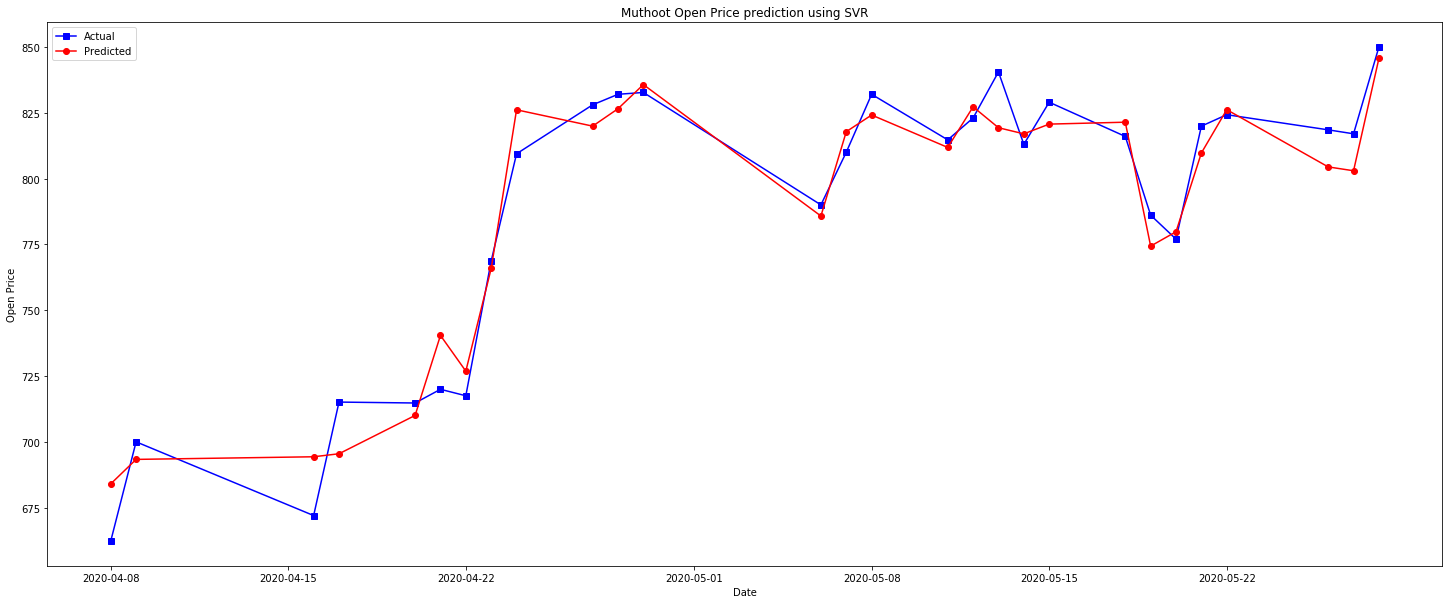

In [85]:
plt.figure(figsize = (25, 10))

plt.plot(test['Actual Open'], 'bs-', label = 'Actual')
plt.plot(test['SVR Predicted Open'], 'ro-', label = 'Predicted')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Open Price")

plt.title('Muthoot Open Price prediction using SVR')
plt.show()

In [86]:
from joblib import dump, load
dump(model_svr, 'muthoot_SVR.joblib')

['muthoot_SVR.joblib']